# Day 4 — Convolutional Neural Network (CNN) on MNIST

Today I trained my **first Convolutional Neural Network (CNN)** to classify handwritten digits (0–9) using the classic **MNIST** dataset.

This notebook is part of my long-term journey into AI, Deep Learning, and practical ML.

**Goals for this notebook:**
- Understand how CNNs process image data.
- Build a simple but effective CNN using TensorFlow / Keras.
- Train and evaluate the model on the MNIST dataset.
- Visualize predictions and reflect on the results.


In [1]:
!pip install -q tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(42)
keras.utils.set_random_seed(42)


2025-11-25 13:45:56.954175: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-25 13:45:59.230548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 13:46:05.074080: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## 1. Load and inspect the MNIST dataset

MNIST is a classic dataset of handwritten digits (0–9):
- 60,000 training images
- 10,000 test images
- Each image has 28×28 pixels in grayscale


In [3]:
# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

print("Unique labels:", np.unique(y_train))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


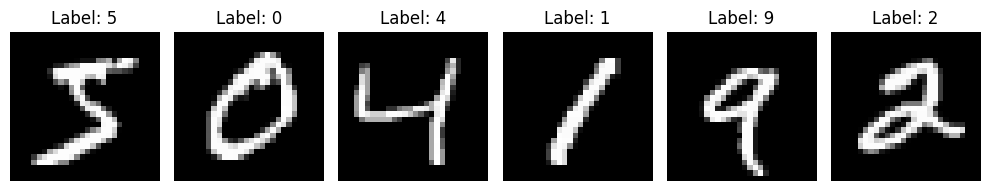

In [4]:
# Visualize a few sample images from the training set

num_samples = 6
plt.figure(figsize=(10, 3))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## 2. Pre-processing

To feed images into a CNN, we need to:

1. Normalize pixel values to the range [0, 1].
2. Add a **channel dimension** (from 28×28 → 28×28×1).
3. Convert labels to one-hot encoded vectors.


In [5]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension: (batch, 28, 28) -> (batch, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("New training images shape:", x_train.shape)
print("New test images shape:", x_test.shape)

# One-hot encode the labels
num_classes = 10
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("One-hot encoded labels shape (train):", y_train_categorical.shape)


New training images shape: (60000, 28, 28, 1)
New test images shape: (10000, 28, 28, 1)
One-hot encoded labels shape (train): (60000, 10)


## 3. Build the CNN model

We will use a simple but effective CNN:

- **Conv2D(32 filters, 3×3) + ReLU**
- **MaxPooling2D(2×2)**
- **Conv2D(64 filters, 3×3) + ReLU**
- **MaxPooling2D(2×2)**
- Flatten → Dense(64, ReLU) → Dense(10, softmax)


In [6]:
# Build the CNN model

input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),

        # First convolution block
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second convolution block
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


2025-11-25 13:48:12.075606: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile the model

We will use:

- **Loss**: `categorical_crossentropy`
- **Optimizer**: `adam`
- **Metrics**: `accuracy`


In [7]:
# Compile the CNN model

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)


## 5. Train the CNN

We will train for a few epochs and keep a validation split to monitor performance.


In [8]:
# Train the model

batch_size = 128
epochs = 5

history = model.fit(
    x_train,
    y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=2,
)


Epoch 1/5


2025-11-25 13:48:58.627677: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


422/422 - 22s - 53ms/step - accuracy: 0.9281 - loss: 0.2489 - val_accuracy: 0.9813 - val_loss: 0.0644
Epoch 2/5
422/422 - 21s - 50ms/step - accuracy: 0.9792 - loss: 0.0676 - val_accuracy: 0.9868 - val_loss: 0.0482
Epoch 3/5
422/422 - 21s - 49ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 4/5
422/422 - 41s - 98ms/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 5/5
422/422 - 21s - 49ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9900 - val_loss: 0.0372


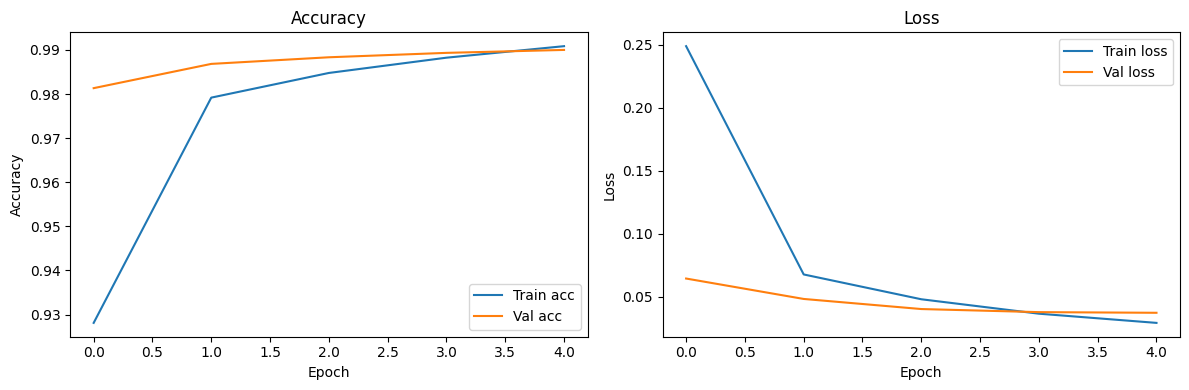

In [9]:
# Plot training and validation accuracy and loss

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train acc")
plt.plot(history.history["val_accuracy"], label="Val acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


## 6. Evaluate the model on the test set


In [10]:
# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


2025-11-25 13:51:48.587192: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


Test loss: 0.0331
Test accuracy: 0.9893


## 7. Visualize predictions

Let's look at some test images, their predicted labels, and the true labels.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


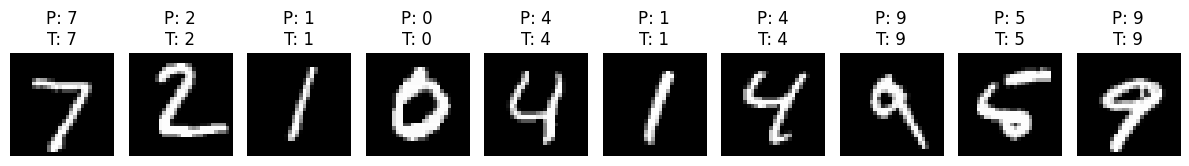

In [11]:
# Make predictions on a subset of the test set

num_images = 10
x_sample = x_test[:num_images]
y_true = y_test[:num_images]

y_pred_proba = model.predict(x_sample)
y_pred = np.argmax(y_pred_proba, axis=1)

plt.figure(figsize=(12, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_sample[i].squeeze(), cmap="gray")
    plt.title(f"P: {y_pred[i]}\nT: {y_true[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## 8. Day 4 Reflection

**What I did today:**
- Built and trained my **first CNN** using TensorFlow / Keras.
- Learned how convolution and pooling layers extract spatial features from images.
- Achieved high accuracy on the MNIST digit classification task.

**Key concepts:**
- Convolutional layers (Conv2D)
- MaxPooling
- Flatten + Dense layers
- One-hot encoding for multi-class classification
- Train / validation / test split and performance monitoring
